<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install 'u8darts[all]'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("/content/eydap_dataset_light.csv")

In [3]:
df['provision_id']=df['provision_id'].astype(str)
df['timestamp'] = pd.to_datetime(df.timestamp, format ='%d-%m-%y')

In [4]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['provision_id', 'meter_id', 'provision_variation', 'meter_variation']


In [5]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('provision_variation', 5),
 ('meter_variation', 9),
 ('provision_id', 12),
 ('meter_id', 29)]

In [6]:
object_cols=['meter_variation','provision_variation']
print(object_cols)

['meter_variation', 'provision_variation']


In [7]:

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))


# One-hot encoding removed index; put it back
OH_cols_df.index = df.index


# Remove categorical columns (will replace with one-hot encoding)
num_df = df.drop(object_cols, axis=1)


# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_df, OH_cols_df], axis=1)

OH_df.head()

,timestamp,provision_id,meter_id,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2014-05-27,2209151,A09S40233,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1992-01-01,527163,A86P05630,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001-01-27,527184,A92Z45058,834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2007-10-11,2072193,A92Z97030,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2001-03-15,1399955,A94E47306,1292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [9]:
OH_df['year'] = df['timestamp'].apply(lambda x: x.year)
OH_df['quarter'] = df['timestamp'].apply(lambda x: x.quarter)
OH_df['month'] = df['timestamp'].apply(lambda x: x.month)
OH_df=OH_df.drop(['meter_id','provision_id'],axis=1)
OH_df = movecol(OH_df, 
             cols_to_move=['year','quarter','month'], 
             ref_col='timestamp',
             place='After')
OH_df.sort_values('timestamp', inplace=True, ascending=True)
OH_df.reset_index(drop=True)



,timestamp,year,quarter,month,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1992-01-01,1992,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2001-01-27,2001,1,1,834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001-01-27,2001,1,1,395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2001-02-01,2001,1,2,103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2001-02-27,2001,1,2,617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2020-07-26,2020,3,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1112,2020-07-26,2020,3,7,62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,2020-07-29,2020,3,7,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1114,2020-07-30,2020,3,7,2197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
OH_df['indication']=OH_df['indication'].fillna(OH_df.groupby(['timestamp'])['indication'].transform('mean'))
OH_df

,timestamp,year,quarter,month,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1992-01-01,1992,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001-01-27,2001,1,1,834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,2001-01-27,2001,1,1,395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
208,2001-02-01,2001,1,2,103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2001-02-27,2001,1,2,617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2020-07-26,2020,3,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1061,2020-07-26,2020,3,7,62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1076,2020-07-29,2020,3,7,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1073,2020-07-30,2020,3,7,2197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
print('Left out missing value:',OH_df.shape[0]-OH_df.count() )

Left out missing value: timestamp     0
year          0
quarter       0
month         0
indication    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
dtype: int64


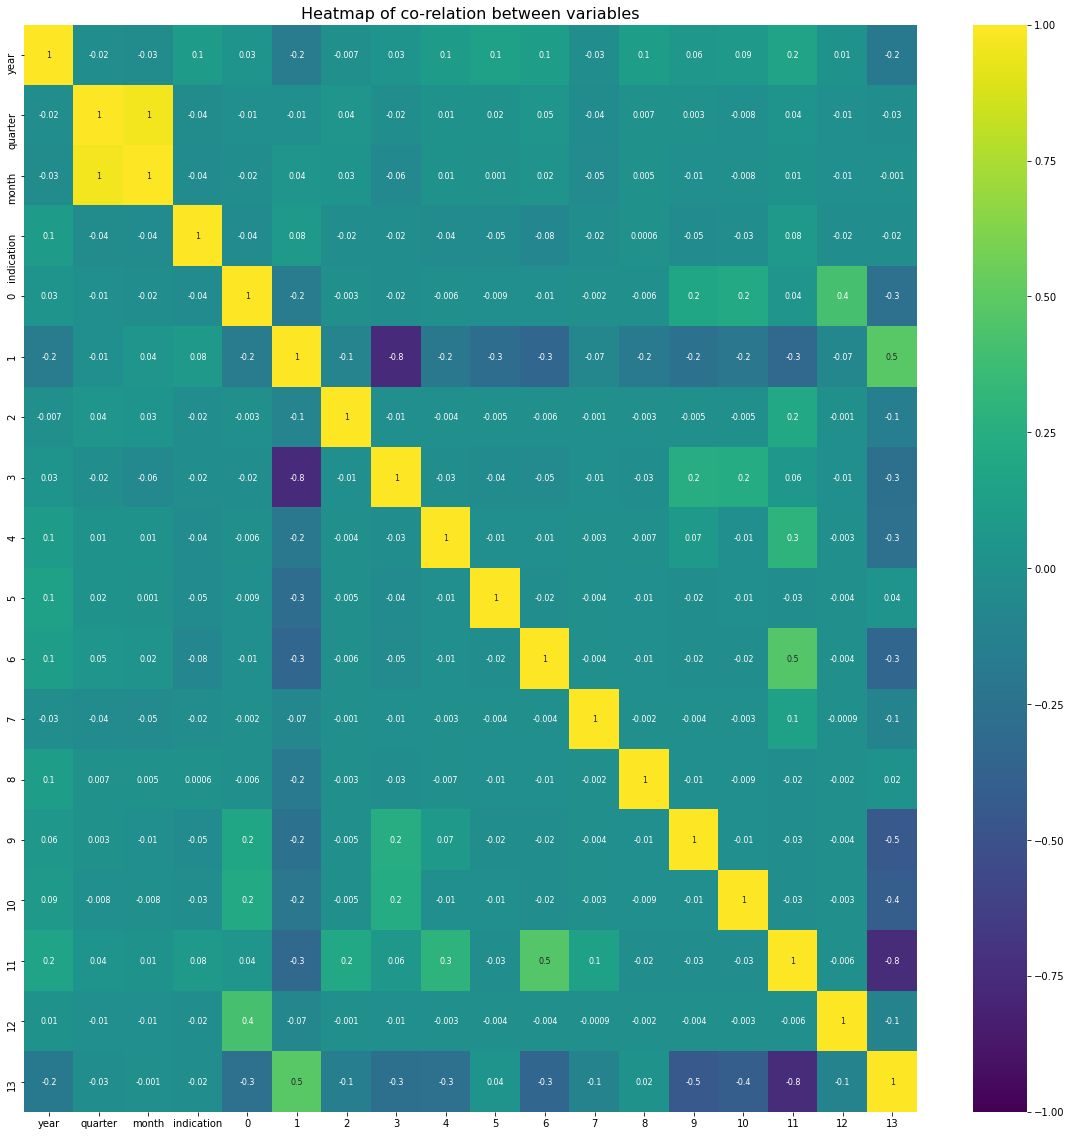

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(OH_df.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,annot_kws={"size":8},cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [13]:
OH_df.head()

,timestamp,year,quarter,month,indication,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1992-01-01,1992,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001-01-27,2001,1,1,834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,2001-01-27,2001,1,1,395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
208,2001-02-01,2001,1,2,103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2001-02-27,2001,1,2,617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
!pip install sktime

     |████████████████████████████████| 5.7MB 12.4MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
     |████████████████████████████████| 9.5MB 38.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import (
    ColumnEnsembleClassifier,
    TimeSeriesForestClassifier,
)
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [17]:
from sktime.utils.data_io import make_multi_index_dataframe
from sktime.utils.data_processing import (
    from_multi_index_to_nested,
    from_nested_to_multi_index,
)

X_mi = make_multi_index_dataframe(OH_df)

print(f"The multi-indexed DataFrame has shape {X_mi.shape}")
print(f"The multi-index names are {X_mi.index.names}")

X_mi.head()

TypeError: ignored

In [15]:
from sktime.utils.data_processing import from_long_to_nested, from_nested_to_long
X_nested = from_long_to_nested(OH_df)
X_nested.head()

KeyError: ignored

In [30]:

X, y = OH_df(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

TypeError: ignored

In [11]:
df=pd.pivot_table(df,values='indication',index=['timestamp'],columns=['provision_id'])
#pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])
df.reset_index(inplace=True)
df.fillna(0,inplace=True)
df


provision_id,timestamp,1306760,1399955,1495939,1499913,1602996,2072193,2209151,527085,527163,527184,534261,666668
0,1992-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0,834.0,0.0,0.0
2,2001-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0
3,2001-02-27,0.0,0.0,0.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2001-03-15,363.0,1292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2020-07-24,0.0,0.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0
643,2020-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0
644,2020-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0
645,2020-07-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2197.0,0.0,0.0,0.0


In [12]:
df=df.set_index(['timestamp'])
df =df.resample('M').ffill()
df2 =df.reset_index()
df2.head()

provision_id,timestamp,1306760,1399955,1495939,1499913,1602996,2072193,2209151,527085,527163,527184,534261,666668
0,1992-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


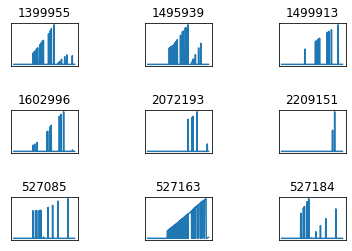

In [13]:
groups = [1,2,3,4,5,6,7,8,9]
values = df.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(df.columns[i])

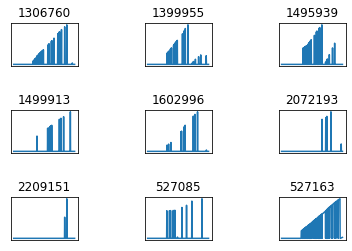

In [14]:
groups = [1,2,3,4,5,6,7,8,9]
values = df2.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(df2.columns[i])

In [ ]:
df.shape


(344, 30)

In [ ]:
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))
report(df)

<b>head():</b>

meter_id,timestamp,A06D06810,A06D06818,A09S40233,A09S44749,A09S45079,A17M00305,A17M00514,A17M00687,A17M00741,A17M01042,A17T30971,A18P03421,A18P03986,A18P18902,A18P33148,A18P37647,A18P38688,A18P39372,A86P05630,A87E33930,A92E06475,A92E14136,A92Z45058,A92Z64097,A92Z97030,A93E03290,A94E47306,A95D23852,A98M46797
0,1992-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>describe():</b>

meter_id,A06D06810,A06D06818,A09S40233,A09S44749,A09S45079,A17M00305,A17M00514,A17M00687,A17M00741,A17M01042,A17T30971,A18P03421,A18P03986,A18P18902,A18P33148,A18P37647,A18P38688,A18P39372,A86P05630,A87E33930,A92E06475,A92E14136,A92Z45058,A92Z64097,A92Z97030,A93E03290,A94E47306,A95D23852,A98M46797
count,344.000000,344.0,344.000000,344.000000,344.000000,344.0,344.0,344.0,344.0,344.0,344.000000,344.0,344.0,344.000000,344.0,344.0,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.00000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.834302,0.0,2.087209,13.505814,13.159884,0.0,0.0,0.0,0.0,0.0,0.584302,0.0,0.0,0.319767,0.0,0.0,0.0,44.962209,28315.735465,441.860465,111.427326,125.482558,25.37500,12.840116,6.075581,155.197674,130.659884,71.941860,19.113372
std,15.474003,0.0,28.572724,114.538318,120.478277,0.0,0.0,0.0,0.0,0.0,10.837194,0.0,0.0,5.930803,0.0,0.0,0.0,273.519447,35832.683423,1574.850931,468.839210,710.419660,156.91786,74.724337,56.274060,589.259748,593.089478,443.693302,90.346701
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,62035.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,287.000000,0.0,468.000000,1470.000000,1615.000000,0.0,0.0,0.0,0.0,0.0,201.000000,0.0,0.0,110.000000,0.0,0.0,0.0,2354.000000,99849.000000,7973.000000,3015.000000,5633.000000,1311.00000,566.000000,589.000000,4007.000000,4471.000000,3927.000000,619.000000


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  344 non-null    datetime64[ns]
 1   A06D06810  344 non-null    float64       
 2   A06D06818  344 non-null    float64       
 3   A09S40233  344 non-null    float64       
 4   A09S44749  344 non-null    float64       
 5   A09S45079  344 non-null    float64       
 6   A17M00305  344 non-null    float64       
 7   A17M00514  344 non-null    float64       
 8   A17M00687  344 non-null    float64       
 9   A17M00741  344 non-null    float64       
 10  A17M01042  344 non-null    float64       
 11  A17T30971  344 non-null    float64       
 12  A18P03421  344 non-null    float64       
 13  A18P03986  344 non-null    float64       
 14  A18P18902  344 non-null    float64       
 15  A18P33148  344 non-null    float64       
 16  A18P37647  344 non-null    float64       
 1

None

<b>infer_dtype():</b>

meter_id
timestamp    datetime64
A06D06810      floating
A06D06818      floating
A09S40233      floating
A09S44749      floating
A09S45079      floating
A17M00305      floating
A17M00514      floating
A17M00687      floating
A17M00741      floating
A17M01042      floating
A17T30971      floating
A18P03421      floating
A18P03986      floating
A18P18902      floating
A18P33148      floating
A18P37647      floating
A18P38688      floating
A18P39372      floating
A86P05630      floating
A87E33930      floating
A92E06475      floating
A92E14136      floating
A92Z45058      floating
A92Z64097      floating
A92Z97030      floating
A93E03290      floating
A94E47306      floating
A95D23852      floating
A98M46797      floating
dtype: object

In [19]:
df['year'] = df['timestamp'].apply(lambda x: x.year)
df['quarter'] = df['timestamp'].apply(lambda x: x.quarter)
df['month'] = df['timestamp'].apply(lambda x: x.month)
df = movecol(df, 
             cols_to_move=['year','quarter','month'], 
             ref_col='timestamp',
             place='After')
df.sort_values('timestamp', inplace=True, ascending=True)
df.reset_index(drop=True)

df.head()

meter_id,timestamp,year,quarter,month,A06D06810,A06D06818,A09S40233,A09S44749,A09S45079,A17M00305,A17M00514,A17M00687,A17M00741,A17M01042,A17T30971,A18P03421,A18P03986,A18P18902,A18P33148,A18P37647,A18P38688,A18P39372,A86P05630,A87E33930,A92E06475,A92E14136,A92Z45058,A92Z64097,A92Z97030,A93E03290,A94E47306,A95D23852,A98M46797
0,1992-01-31,1992,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-02-29,1992,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-03-31,1992,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-04-30,1992,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-05-31,1992,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(344, 33)

In [21]:
df1 = pd.concat([df,OH_df])
#df1=df1.drop(['meter_id','provision_id','indication'], axis=1)
#df1=df1.drop(['indication'], axis=1)
df1.fillna(0,inplace=True)


In [ ]:
df1

,timestamp,year,quarter,month,A06D06810,A06D06818,A09S40233,A09S44749,A09S45079,A17M00305,A17M00514,A17M00687,A17M00741,A17M01042,A17T30971,A18P03421,A18P03986,A18P18902,A18P33148,A18P37647,A18P38688,A18P39372,A86P05630,A87E33930,A92E06475,A92E14136,A92Z45058,A92Z64097,A92Z97030,A93E03290,A94E47306,A95D23852,A98M46797,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1992-01-31,1992,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-02-29,1992,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-03-31,1992,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-04-30,1992,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-05-31,1992,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2020-07-26,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1061,2020-07-26,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076,2020-07-29,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,2020-07-30,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.tail()

,timestamp,year,quarter,month,A06D06810,A06D06818,A09S40233,A09S44749,A09S45079,A17M00305,A17M00514,A17M00687,A17M00741,A17M01042,A17T30971,A18P03421,A18P03986,A18P18902,A18P33148,A18P37647,A18P38688,A18P39372,A86P05630,A87E33930,A92E06475,A92E14136,A92Z45058,A92Z64097,A92Z97030,A93E03290,A94E47306,A95D23852,A98M46797,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1081,2020-07-26,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1061,2020-07-26,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076,2020-07-29,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,2020-07-30,2020,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,2020-08-31,2020,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

df1.isnull().sum()

In [ ]:
df1.groupby(['timestamp']).count()